# Analysis based on the language of the speakers
The dataset has been divided into groups by following three different criteria:
    
- en_nation
- native
- proficiency

The evaluation considers the alignement between self-attention for the AD and the lexical units annotated.

In [1]:
from itertools import groupby
from collections import defaultdict

import utils

FOLDER_SPEAKERS_SUBSET = '../nlunetwork/results/speaker_subsets'
FOLDER_CONFIGURATION = 'eval_loss_both_slottype_full_we_large_recurrent_cell_lstm_attention_both_three_stages___hyper:LABEL_EMB_SIZE=64,LSTM_SIZE=128,BATCH_SIZE=2,MAX_EPOCHS=50'
FOLDER_RES = 'huric_eb/speakers_split'

EN_NATION_TRUE = 'en_nation/true'
EN_NATION_FALSE = 'en_nation/false'
NATIVE_YES = 'native/yes'
NATIVE_WEAK = 'native/weak english speaker'
NATIVE_SOLID = 'native/solid english speaker'
PROFICIENCY_YES = 'proficiency/yes'
PROFICIENCY_NO = 'proficiency/no'

full_path = lambda x: '{}/{}/{}/{}'.format(FOLDER_SPEAKERS_SUBSET, FOLDER_CONFIGURATION, FOLDER_RES, x)

Sub-datasets complexities

In [2]:
BASE_XML_LOCATION = '../data/huric_eb/'
FULL_DATASET_LOCATION = BASE_XML_LOCATION + 'modern/source'
EN_NATION_TRUE_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + EN_NATION_TRUE + '/source'
EN_NATION_FALSE_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + EN_NATION_FALSE + '/source'
NATIVE_YES_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_YES + '/source'
NATIVE_WEAK_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_WEAK + '/source'
NATIVE_SOLID_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_SOLID + '/source'
PROFICIENCY_YES_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + PROFICIENCY_YES + '/source'
PROFICIENCY_NO_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + PROFICIENCY_NO + '/source'
full_stats = utils.get_corpus_complexity_statistics(FULL_DATASET_LOCATION)
en_true_stats = utils.get_corpus_complexity_statistics(EN_NATION_TRUE_DATASET_LOCATION)
en_false_stats = utils.get_corpus_complexity_statistics(EN_NATION_FALSE_DATASET_LOCATION)
native_yes_stats = utils.get_corpus_complexity_statistics(NATIVE_YES_DATASET_LOCATION)
native_weak_stats = utils.get_corpus_complexity_statistics(NATIVE_WEAK_DATASET_LOCATION)
native_solid_stats = utils.get_corpus_complexity_statistics(NATIVE_SOLID_DATASET_LOCATION)
proficiency_yes_stats = utils.get_corpus_complexity_statistics(PROFICIENCY_YES_DATASET_LOCATION)
proficiency_no_stats = utils.get_corpus_complexity_statistics(PROFICIENCY_NO_DATASET_LOCATION)

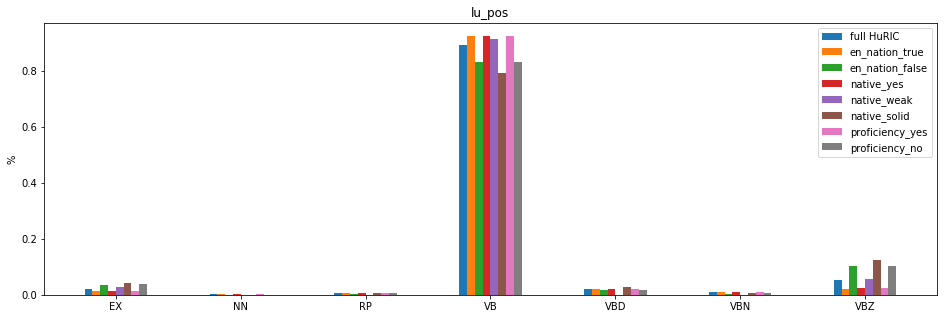

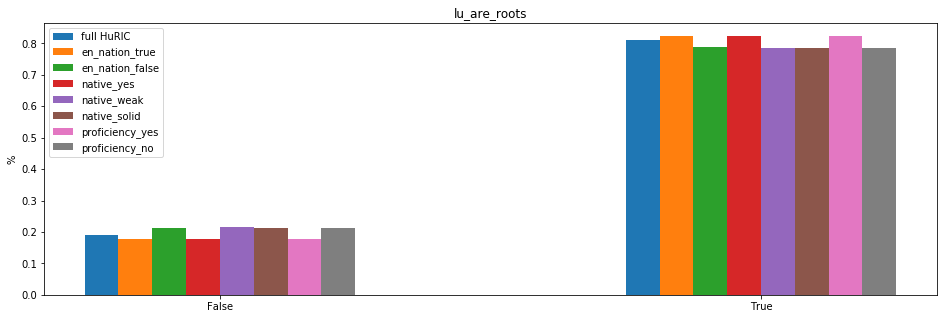

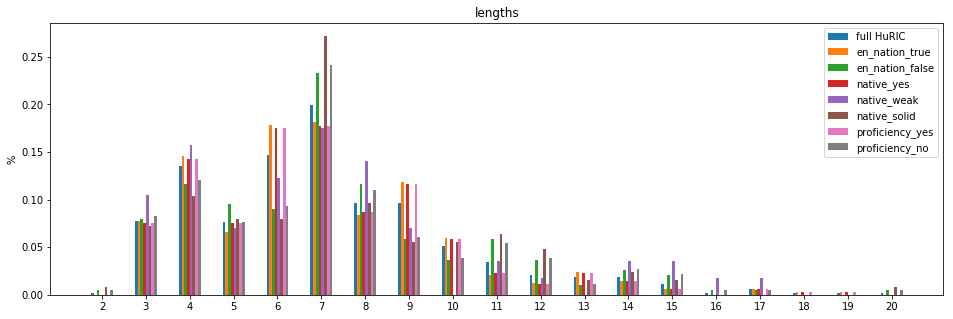

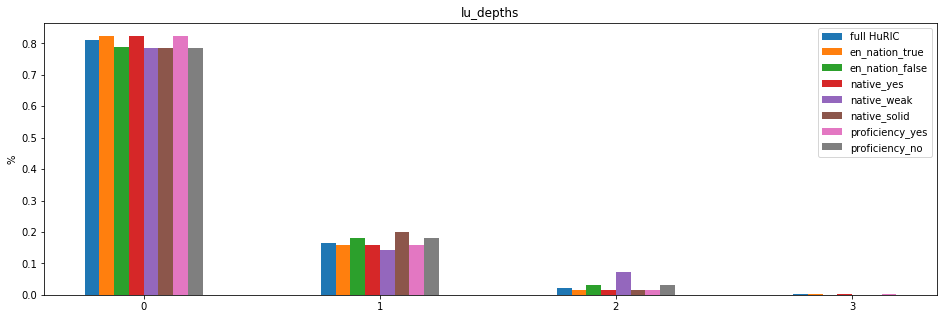

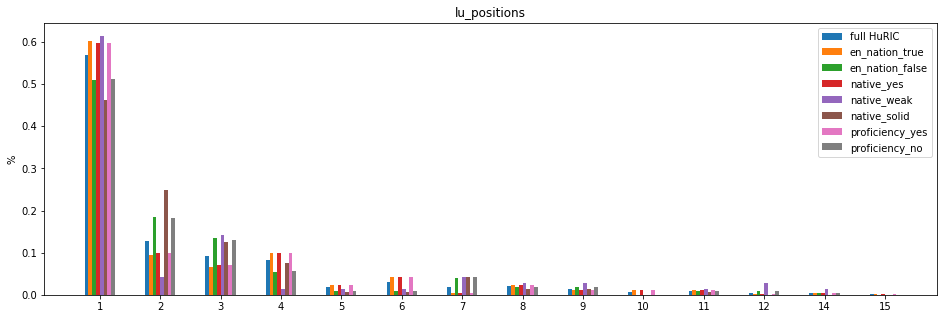

In [3]:
utils.plot_measures({
    'full HuRIC': full_stats,
    'en_nation_true': en_true_stats,
    'en_nation_false': en_false_stats,
    'native_yes': native_yes_stats,
    'native_weak': native_weak_stats,
    'native_solid': native_solid_stats,
    'proficiency_yes': proficiency_yes_stats,
    'proficiency_no': proficiency_no_stats
})

## en_nation

Speakers belonging to countries that have as primary language english. `['USA', 'Britain', 'Australia', 'Ireland']` 

### true

Being_located 1
[('chairs', 0.9556973576545715), ('six', 0.04191555455327034), ('room', 0.0007480864296667278)]
Bringing 16
[('to', 0.3007639870047569), ('bring', 0.18207433295901865), ('near', 0.12550441548228264)]
Change_operational_state 7
[('tv', 0.27680214813777376), ('wifi', 0.14245968205588205), ('computer', 0.13920635836465017)]
Closure 3
[('bottle', 0.3275499939918518), ('recorder', 0.3188881476720174), ('room', 0.29812077681223553)]
Entering 1
[('bathroom', 0.9939512014389038), ('the', 0.005104902200400829), ('enter', 0.0001759675214998424)]
Following 2
[('me', 0.3775605410337448), ('table', 0.2709175944328308), ('behind', 0.2686147689819336)]
Giving 1
[('a', 0.8184324502944946), ('me', 0.11538022011518478), ('plate', 0.0565371997654438)]
Inspecting 1
[('empty', 0.9815531969070435), ('is', 0.014404283836483955), ('machine', 0.0032137667294591665)]
Motion 12
[('the', 0.1502486908963571), ('kitchen', 0.14938154816627502), ('bedroom', 0.12388141453266144)]
Placing 6
[('counter',

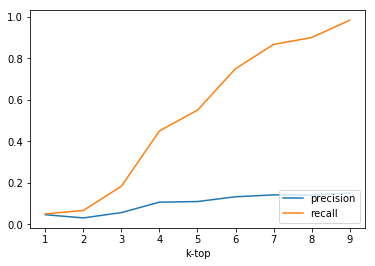

In [4]:
samples_en_nation_true = utils.load_json(full_path(EN_NATION_TRUE), 49)
groups_en_nation_true = utils.group_samples_by_frame(samples_en_nation_true)
for g_name, g_samples in groups_en_nation_true.items():
    print(g_name, len(g_samples))
    bow_sorted_attn = utils.get_words_by_attention(g_samples)
    print(bow_sorted_attn[:3])
print('lexical_unit score:', utils.align_accuracy_argmax(samples_en_nation_true))
_ = utils.align_score(samples_en_nation_true)

### false

Being_in_category 2
[('right', 0.3614145517349243), ('and', 0.2363511174917221), ('light', 0.10531044751405716)]
Being_located 3
[('the', 0.3706213278346695), ('two', 0.30378767640407506), ('dining', 0.23400876919428507)]
Bringing 8
[('bathroom', 0.2216019406914711), ('the', 0.13770268179359846), ('bed', 0.10694519430398941)]
Following 5
[('follow', 0.82360337972641), ('me', 0.07306045591831208), ('the', 0.03967299396172166)]
Motion 7
[('kitchen', 0.13562278236661637), ('room', 0.12551958220345633), ('shower', 0.12397719281060356)]
Placing 3
[('the', 0.29784876342940453), ('room', 0.2740634083747864), ('table', 0.19907782475153604)]
Searching 6
[('plate', 0.14848442872365317), ('pillow', 0.13904956976572672), ('room', 0.13747158646583557)]
Taking 5
[('the', 0.3311896724626422), ('glass', 0.18868061304092407), ('me', 0.12576236724853515)]
lexical_unit score: 0.1282051282051282


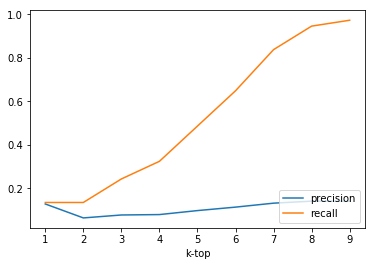

In [5]:
samples_en_nation_false = utils.load_json(full_path(EN_NATION_FALSE), 49)
groups_en_nation_false = utils.group_samples_by_frame(samples_en_nation_false)
for g_name, g_samples in groups_en_nation_false.items():
    print(g_name, len(g_samples))
    bow_sorted_attn = utils.get_words_by_attention(g_samples)
    print(bow_sorted_attn[:3])
print('lexical_unit score:', utils.align_accuracy_argmax(samples_en_nation_false))
_ = utils.align_score(samples_en_nation_false)

## native

### yes

lexical_unit score: 0.29411764705882354


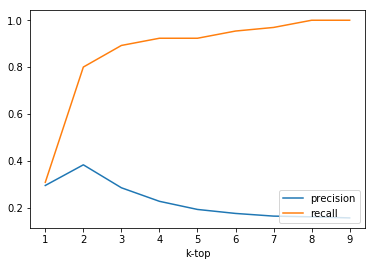

In [6]:
samples_native_yes = utils.load_json(full_path(NATIVE_YES), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_yes))
_ = utils.align_score(samples_native_yes)

### solid english speaker

lexical_unit score: 0.2727272727272727


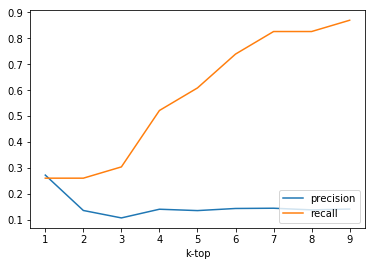

In [7]:
samples_native_solid = utils.load_json(full_path(NATIVE_SOLID), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_solid))
_ = utils.align_score(samples_native_solid)

### weak english speaker

lexical_unit score: 0.3


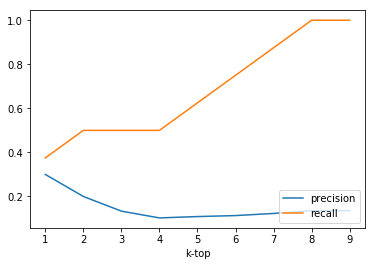

In [8]:
samples_native_weak = utils.load_json(full_path(NATIVE_WEAK), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_weak))
_ = utils.align_score(samples_native_weak)

## proficiency

### yes

lexical_unit score: 0.2647058823529412


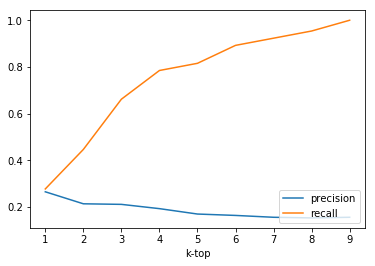

In [9]:
samples_proficiency_yes = utils.load_json(full_path(PROFICIENCY_YES), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_proficiency_yes))
_ = utils.align_score(samples_proficiency_yes)

### no

lexical_unit score: 0.19444444444444445


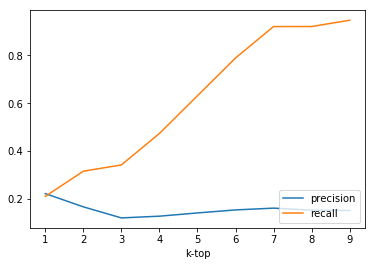

In [10]:
samples_proficiency_no = utils.load_json(full_path(PROFICIENCY_NO), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_proficiency_no))
_ = utils.align_score(samples_proficiency_no)